A simplified model of WG motion
------
The goal of these notes is to test the fidelity of a simplified model of WG motion. The bones of the argument are that we will model the float and sub as fluid particles on seperate material contours, coupled by a spring. We will assume the motion of the float is linearly damped, while the motion of the sub is forced. 

Nick Pizzo, June 20, 2021

The model
---------
The theoretical model is based on the motion of a bead on a wire. As will be shown, there is a direct analog of the motion of a bead on a wire and that of a particle on a material contour in a fluid (with the resulting equation known as John's equation). In fact, they obey the same equations of motion. Then, if we are prescribing the motion of these material contours (ie the wire), we can compute the resulting behavior of the beads. 

The theory can handle fully nonlinear motion, but not wave breaking. It can also be extended to three dimensions. 

Defintions
---------
We have two particles, one located at position $(x_1,y_1)$ and the other at $(x_2,y_2)$. We assume the acceleration due to gravity is $g$. The damping of the float is given by $\nu$, while the forcing coefficient for the sub is denoted by $\alpha$. We denote the spring constant as $\kappa$ and assume it has equilibrium length $d$. We take the masses of the particles to be unity. 

Model equations
-------
The kinetic energy of the system is given by
$$2T = \dot{x}_1^2+\dot{x}_2^2+\dot{y}_1^2+\dot{y}_2^2$$. 

As the beads are confined to the wire, we can write the vertical component as a $graph$ of the horizontal component, i.e. $y_1 = \eta(x_1(t),t)$ and $y_2 = h(x_2(t),t)$ so that 
$$ \dot{y}_1 = \eta_t + \dot{x}_1\eta_x,$$
$$ \dot{y}_2 = h_t + \dot{x}_2h_x.$$

The kinetic energy becomes 
$$ 2T = \dot{x}_1^2(1+\eta_x^2)+\dot{x}_2^2(1+h_x^2) +\eta_t^2+h_t^2+2(\dot{x}_1\eta_t\eta_x+\dot{x}_2h_th_x).$$

Next, the potential energy is given by 
$$V = g(y_1+y_2)+\frac{\kappa}{2}(d-l)^2,$$
where
$$ l^2 =(x_1-x_2)^2+(y_1-y_2)^2.$$

The Lagrangian is given by $L=T-V$, and the equations of motion following from the Euler-Lagrange equations, which here will be
$$\frac{d}{dt}\left(\frac{\partial L}{\partial \dot{x}_i}\right) -\frac{\partial L}{\partial x_i} = Q_i,$$
for $i=(1,2)$ and $Q_i$ the source and sink terms - which will damp/force the float/sub, respectively. 

Now, it is worth noting that this formulation is able to handle fully nonlinear water waves. However, we need not start with this formulation. Instead, we assume that the material contours have small amplitude. That is, we let
$$ \eta = \epsilon \eta'; \quad h = -d+\epsilon h',$$
where we'll drop the prime from hereinafter for clarity of presentation. Note, the behavior of the particles is still nonlinear - but the waves themselves are linear. It could be a useful excercise to use this approach to estimate how much of the variance of the platform motion can be driven by nonlinear waves. 

The Euler-Lagrange equations applied to our Lagrangian, expanded to $O(\epsilon)$ then imply
$$\ddot{x}_1+g\epsilon \eta_x -\frac{\kappa}{L^3}\left((d-L)L^2(x_1-x_2)+d^2(x_1-x_2)(h-\eta)-d(-d+L)L^2\eta_x\right) = Q_1,$$
$$\ddot{x}_2+g\epsilon h_x +\frac{\kappa}{L^3}\left((d-L)L^2(x_1-x_2)-d^2(x_1-x_2)(h-\eta)+d(-d+L)L^2h_x\right)  = Q_2,$$
where
$$L = \sqrt{d^2+(x_1-x_2)^2}$$.

Again, the motion of the particles is nonlinear in this formulation. We could do some asymptotics and solve for the particle motion to some prescribed order. However, we instead examine this numerically as it allows for a simple examination of parameter space. 

Next, we clarify the source terms $Q_i$. First, we expect there to be damping from the float. We take the simplest approach and define
$Q_1 = -\nu \dot{x}_1,$
which implies simple linear damping (cf a classical harmonic oscillator). Next, we assume that the sub is accelerated by vertical dispacements, which should be proportional to the amplitude (we could also make this proportional to the slope - discuss!) of the displacements. This implies 
$Q_2 = \beta |y_2|.$

Let's explicitly write out the equations of motion: 
$$\boxed{\ddot{x}_1+g\epsilon \eta_x -\frac{\kappa}{L^3}\left((d-L)L^2(x_1-x_2)+d^2(x_1-x_2)(h-\eta)-d(-d+L)L^2\eta_x\right)  = -\nu \dot{x}_1,\\
\ddot{x}_2+g\epsilon h_x +\frac{\kappa}{L^3}\left((d-L)L^2(x_1-x_2)-d^2(x_1-x_2)(h-\eta)+d(-d+L)L^2h_x\right) = \beta |x_2|.}$$


Numerics
----
We now code up solutions to our governing equations in Matlab

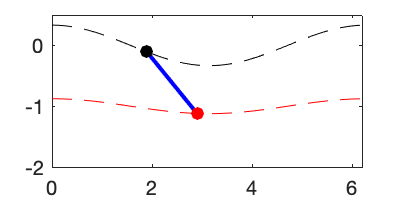

In [118]:
%% Problem set up
imatlab_export_fig('print-png')
dx = 1/10; 
x = 0 : dx : 2 * pi; 
a = 1/3; % amplitude of eta
k = 1; % wavelength 
eta = a * cos( k * x );
d = 1; % initial distance between sub/float. 
b = a * exp( - k * d ); % amplitude of h - this depends on how we choose d.
h = b * cos( k * x ); 
% plot this
plot(x, eta, '--k')
hold on
plot(x, h-d, '--r')
hold on
plot([x(20) x(30)],[eta(20) h(30)-d], 'b', 'linewidth', 2 )
hold on
plot(x(20), eta(20),'ko', 'markerfacecolor','k')
hold on
plot(x(30), h(30)-d,'ro', 'markerfacecolor','r')
ylim([-2 1/2])
set(gcf, 'Position',  [100, 100, 200, 100])
set(gcf,'color','w')

In [119]:
function dydt = WGM(t,y,g,nu,beta,kappa,k,omega,a,d,z)
etax = - a*k*sin(k * y(1)-omega * t);
hx = - a*k*exp(-k * z)*sin(k * y(3) - omega * t);
dydt(1) = y(2);
dydt(2) = - g * etax - kappa * (y(1)-y(3)-d) + nu * y(2);
dydt(3) = y(4); 
dydt(4) = - g * hx + kappa * (y(1)-y(3)-d) + beta * abs(y(3)); 
dydt=dydt';

Error: Function definition not supported in this context. Create functions in code file.



Note: I created this function outside of the notebook. I'm not sure if in line function defintions are supported in Jupyter? 

Example 1: No coupling, no forcing/damping
---------

In [150]:
%% solve DE
%define parameters. I am doing this at random right now. need realistic values
g = 9.81; 
nu = 0*1e-3;
beta = 0*1e-3;
kappa = 0*1e1;
k = 1;
a = 1/30; 
omega = sqrt(g * k);
z = 2; 
d = z;
tspan = [0 20];
IC = [0; a*omega; 0; a * exp(- k * z) * omega]; %these need to 
%be chosen to satisfy the e.o.m. for water waves
[t,y] = ode45(@(t,y) WGM(t,y,g,nu,beta,kappa,k,omega,a,d,z),tspan,IC);

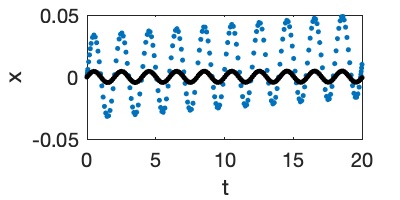

In [158]:
%% visualize results
% first look at horizontal position versus time
plot(t,y(:,1),'.')
hold on
plot(t,y(:,3),'k.')
xlabel('t')
ylabel('x')
set(gcf, 'Position',  [100, 100, 200, 100])
set(gcf,'color','w')

Note, here the blue points are the surface particles and the black are those at depth. I.e. blue is the float, black is the sub

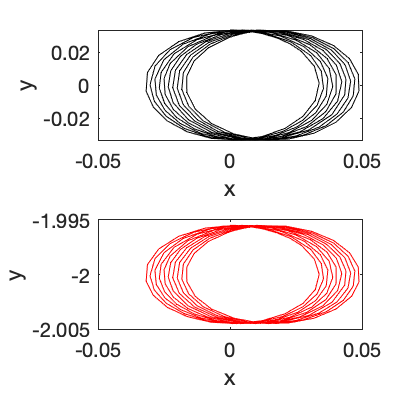

In [156]:
%% look at trajectories 
y1 = a * cos(k * y(:,1) - omega * t);
y2 = a * exp(- z * k) * cos(k * y(:,3) - omega * t);
subplot(2,1,1)
plot(y(:,1),y1,'k')
xlabel('x')
ylabel('y')
subplot(2,1,2)
plot(y(:,1),-z+y2,'r')
xlabel('x')
ylabel('y')
set(gcf, 'Position',  [100, 100, 200, 200])
set(gcf,'color','w')

Example 2: Coupled/forced/damped
--------

In [200]:
%% solve DE
%define parameters. I am doing this at random right now. need realistic values
g = 9.81; 
nu = 1e-3;
beta = 1e-3;
kappa = 1e-2;
k = 1;
a = 1/10; 
omega = sqrt(g * k);
z = 2; 
d = z;
tspan = [0 20];
IC = [0; a*omega; 0; a * exp(- k * z) * omega]; %these need to 
%be chosen to satisfy the e.o.m. for water waves
[t,y] = ode45(@(t,y) WGM(t,y,g,nu,beta,kappa,k,omega,a,d,z),tspan,IC);

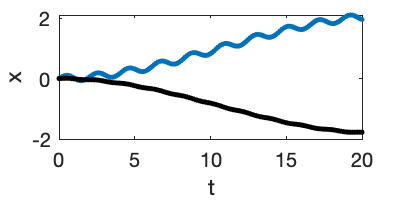

In [201]:
%% visualize results
% first look at horizontal position versus time
plot(t,y(:,1),'.')
hold on
plot(t,y(:,3),'k.')
xlabel('t')
ylabel('x')
set(gcf, 'Position',  [100, 100, 200, 100])
set(gcf,'color','w')

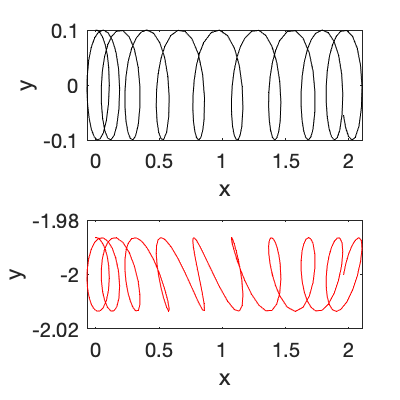

In [202]:
%% look at trajectories 
y1 = a * cos(k * y(:,1) - omega * t);
y2 = a * exp(- z * k) * cos(k * y(:,3) - omega * t);
subplot(2,1,1)
plot(y(:,1),y1,'k')
xlabel('x')
ylabel('y')
subplot(2,1,2)
plot(y(:,1),-z+y2,'r')
xlabel('x')
ylabel('y')
set(gcf, 'Position',  [100, 100, 200, 200])
set(gcf,'color','w')

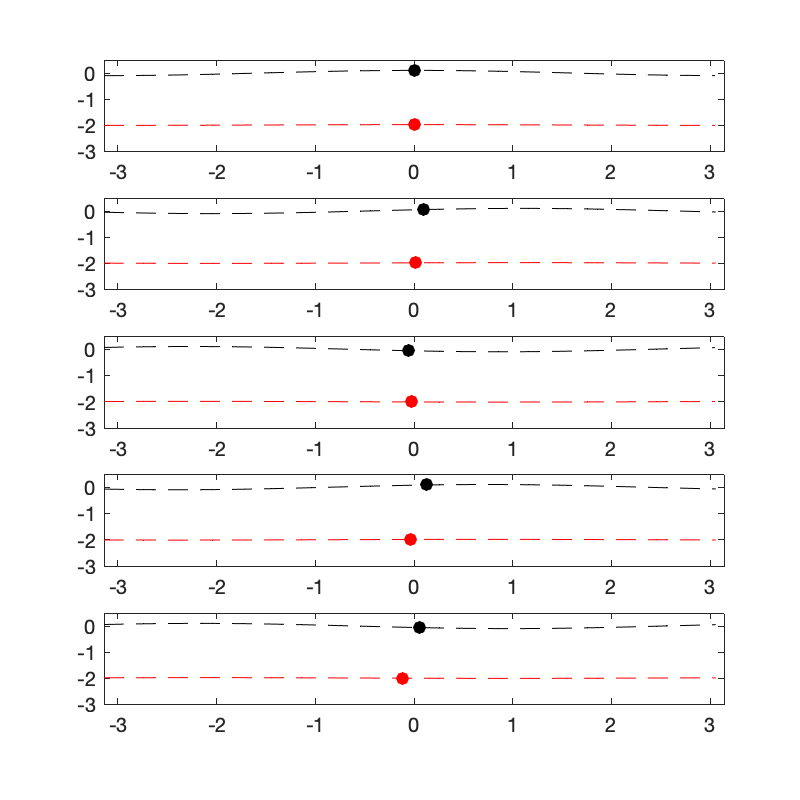

In [203]:
%% time sequences
x = [-pi: .1: pi];
for i = 1 : 5 
subplot(5,1,i)
j = 10*i; 
plot(x, a * cos(k*x-omega*t(j)),'--k')
hold on
plot(y(j,1),y1(j),'ok','markerfacecolor','k')
hold on
plot(x, -z+a *exp(-k * z)*cos(k*x-omega*t(j)),'--r')
hold on
plot(y(j,3), -2+y2(j),'or','markerfacecolor','r')
ylim([-3 1/2])
xlim([-pi pi])
end
set(gcf, 'Position',  [100, 100, 400, 400])
set(gcf,'color','w')

This is a time evolution of the surface and at depth. 

I need to make some videos of this to get a better idea of what's going on. 

Connection to surface waves
----
How is the model for a bead on a wire related to particle motion in the ocean? 

Following John (1953), we know that the stress (ie pressure for irrotational flow) must act normally for the flow the remain irrotational at a material contour. This implies that gradients to the material contours are parallel to gradients of the pressure, i.e. 
$$\nabla(y-\eta) \times \nabla p =0$$. Then, from the Euler equations we can solve for the pressure and put this into this relationship to find
$$\ddot{x}+\eta_x(g+\ddot{y}) = 0.$$
As $\dot{y}=\eta_t+\dot{x}\eta_x$, we can solve this equation in terms of $x$ only, finding
$$\ddot{x}(1+\eta_x^2)+2\eta_x\eta_{xt}\dot{x}+\eta_x\eta_{xx}\dot{x}^2+\eta_x(g+\eta_{tt})=0,$$
which is exactly what may be found above for the motion of the bead on the wire! 

John derived this for the free surface but this should hold for any material contour of the flow. 